# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to set a graph theme in seaborn
sns.set_theme(style="darkgrid",  palette="husl")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading the data

In [3]:
# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/Learning/PGPDSBA/Project-7/stock_data.csv')

### Creating a copy of original data

In [4]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

## Data Overview

- Observations
- Sanity checks

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [5]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 340 rows and 15 columns.


### Displaying few rows of the dataset

In [6]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

### Checking the data types of the columns for the dataset

In [7]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Checking for duplicates and missing values

In [8]:
#Checking for duplicate entries in the data
df.duplicated().sum()

np.int64(0)

In [9]:
#Checking for missing values in the data
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [10]:
df.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                ZTS    1   
Security                                                  Zoetis    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327937   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

**Summary from Data Overview**

* There are 340 rows and 15 columns in the testing set

* There are 4 categorical columsn and the rest of the columns are numeric

* There are no duplicate rows of data in the dataset

* There are no missing values in any of the columns in teh dateset

**From Statistical summary:**
* There are data from 11 unique GICS sectors and 104 unique GICS Sub industry
* There are a wide range of values in most of the numeric columns with current price ranging from 4.5 to 1275
* Cash ratio, ROE, P/E and P/B ratios also found to have a large range of values
* This wide range may be an indication of possible outliers

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

***We will answer these questions as we get through the different phases of the EDA process below***

### Univariate analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7),kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

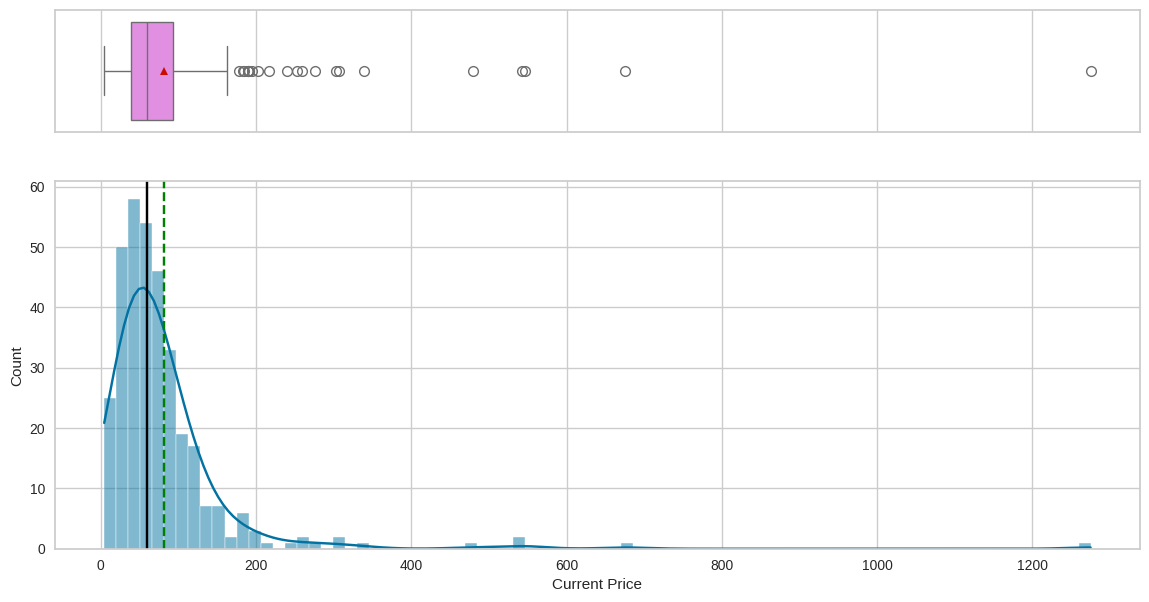

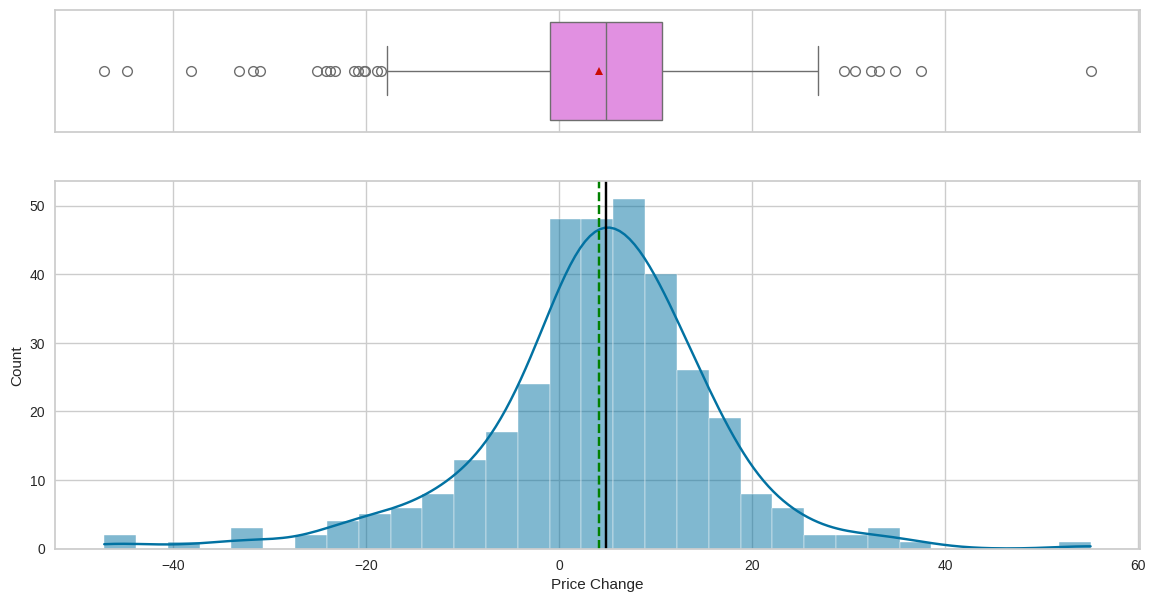

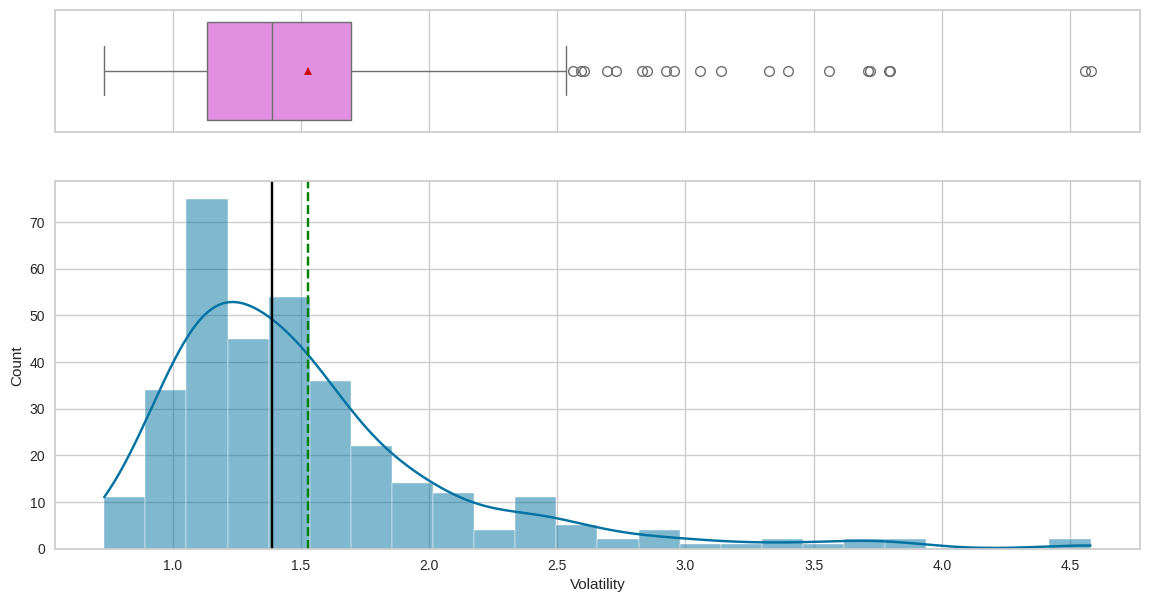

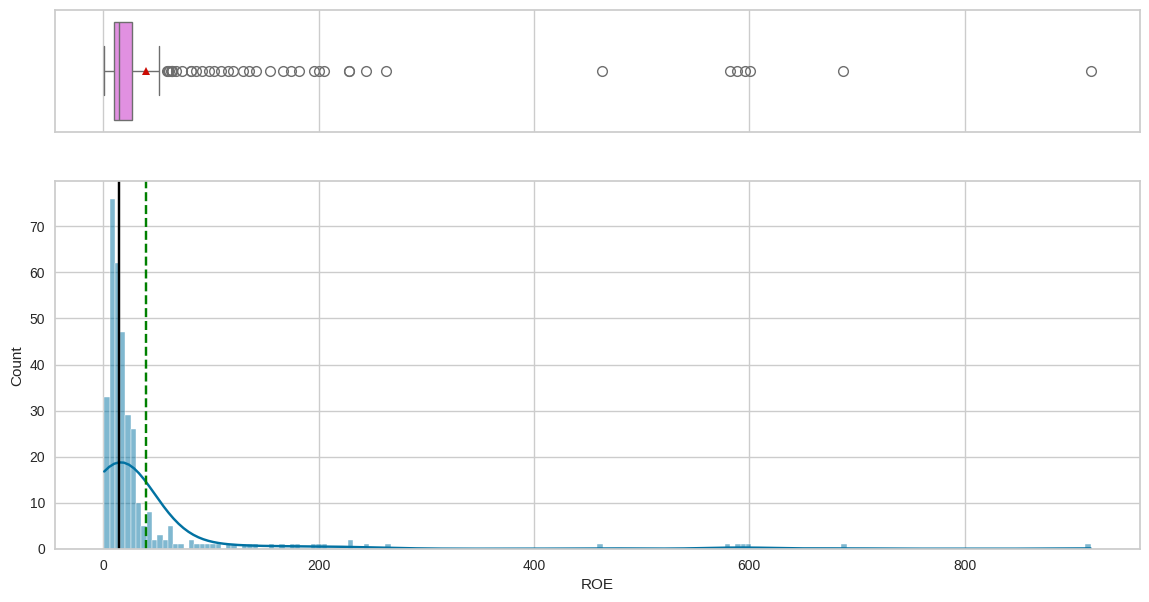

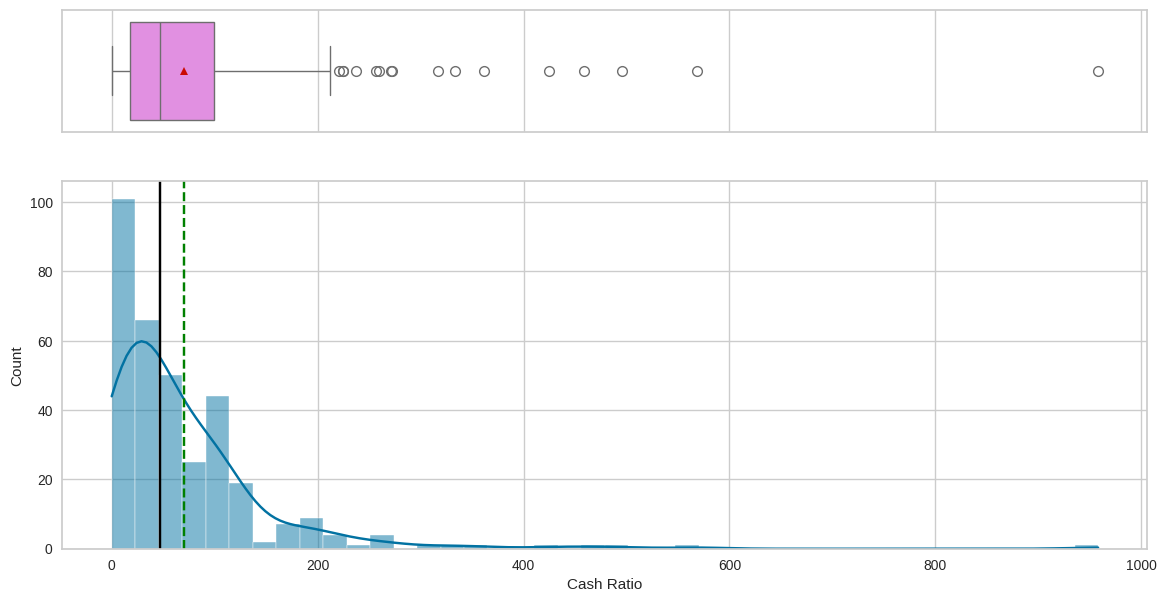

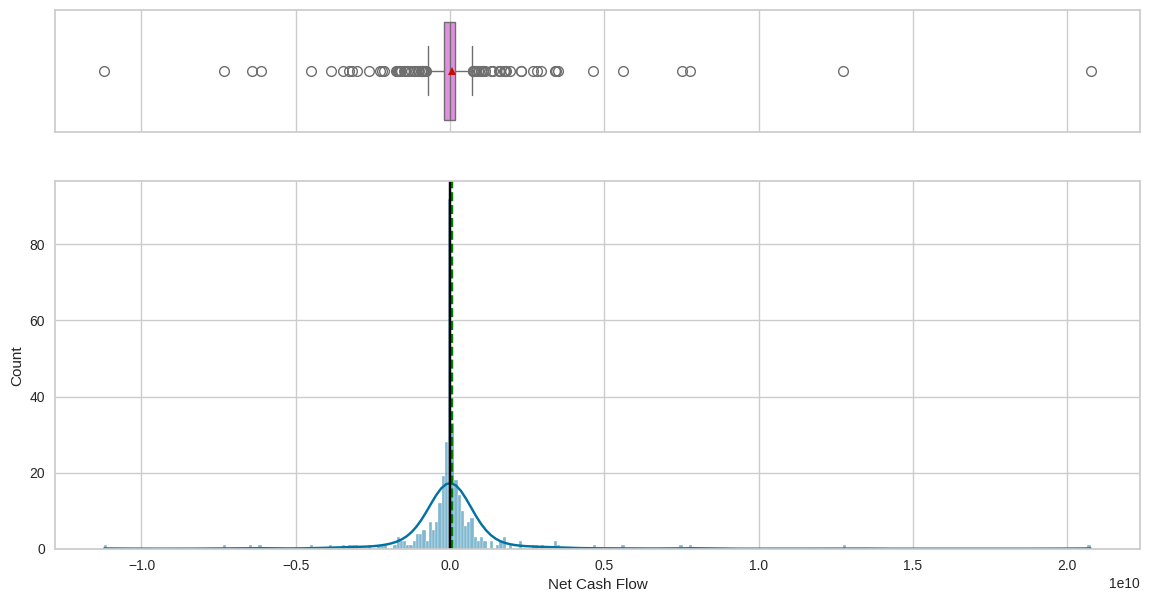

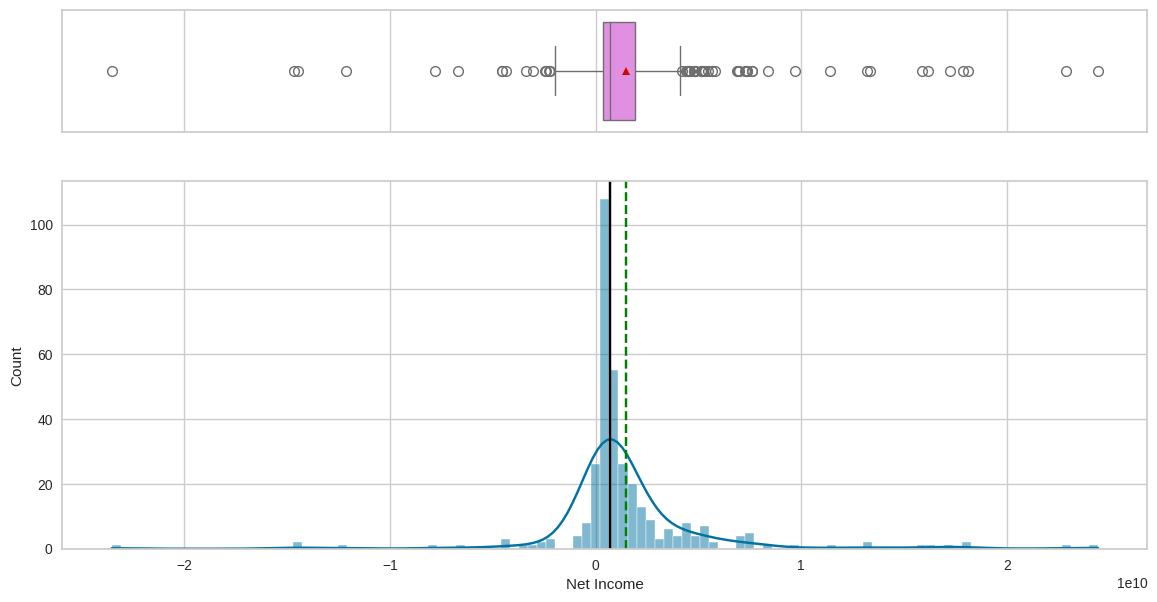

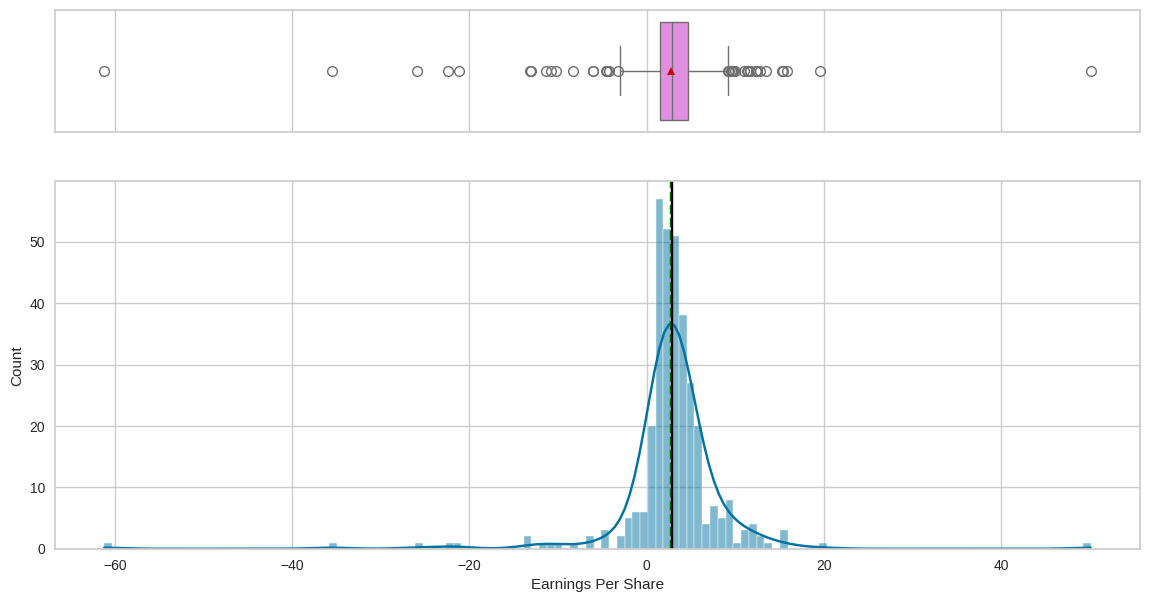

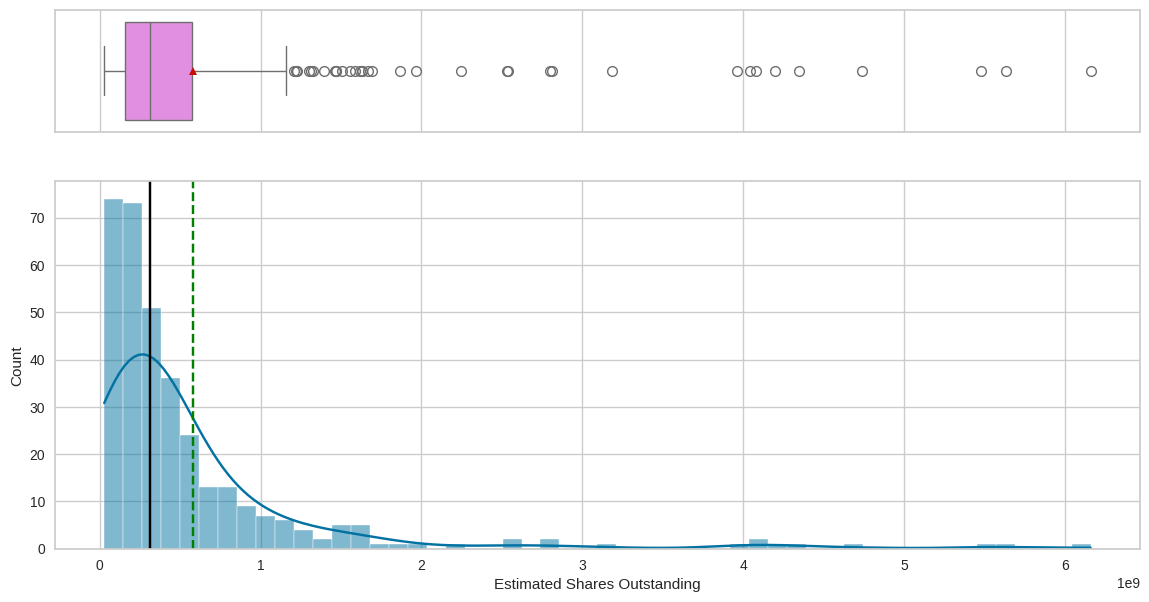

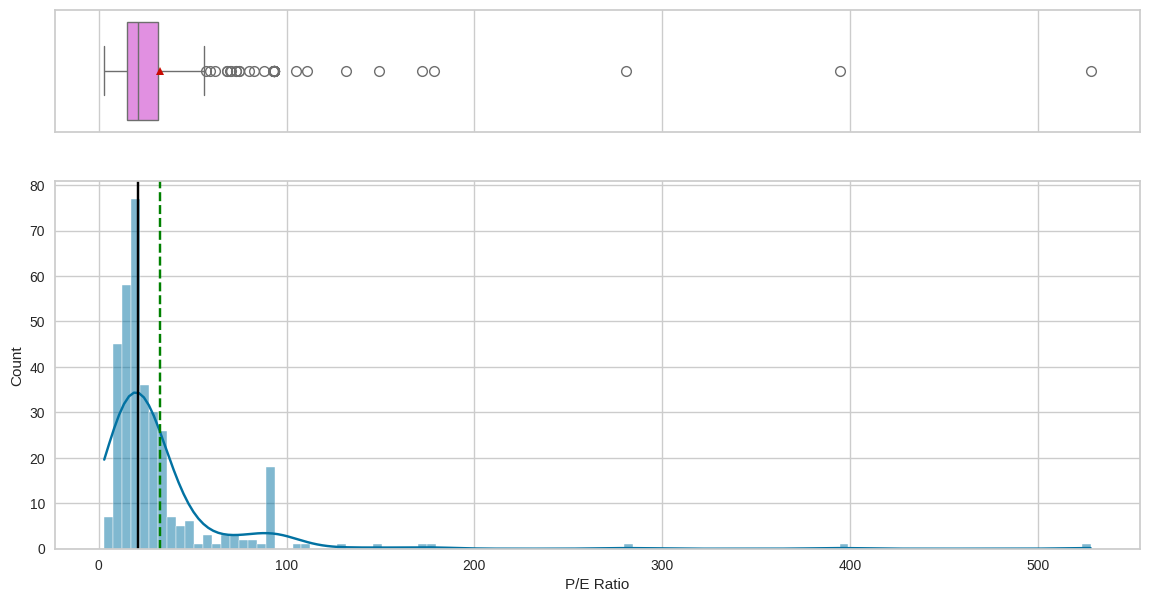

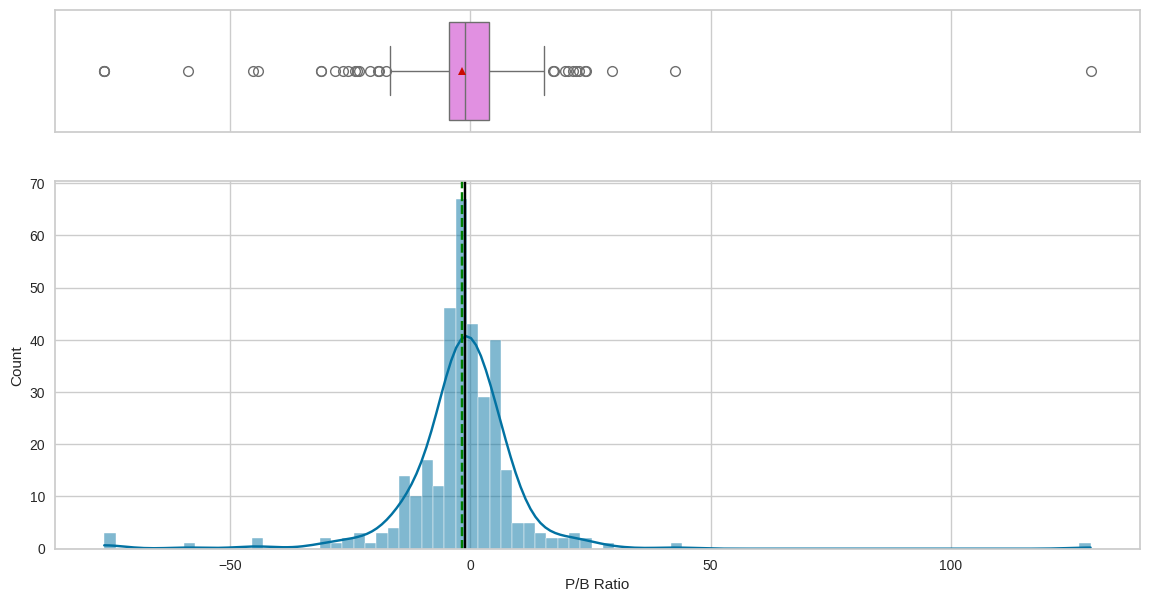

In [13]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for cols in num_cols:
    histogram_boxplot(df, cols,figsize=(14, 7))

**Q1: What does the distribution of stock prices look like?**
* The distribution of stock proices appear to be right skewed.
* Most of teh stock prices are distributed at the lower end of the price range with a long tail indicating extreme high values. These may not be treated as  outliers as there could be stocks at teh higher prices too

Other observation from the above plots:
* The columns - **"Price change", "Net cash flow", "Net income"** appear to be some what a normal distribution
* **"Volatility", "ROE", "Cash Ratio","Estimated shares outstanding","P/E ratio"** looks to be right distributed with a long tail

* **"Earnings per share","P/B Ratio"**  looks to be very slightly left skewed


In [14]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

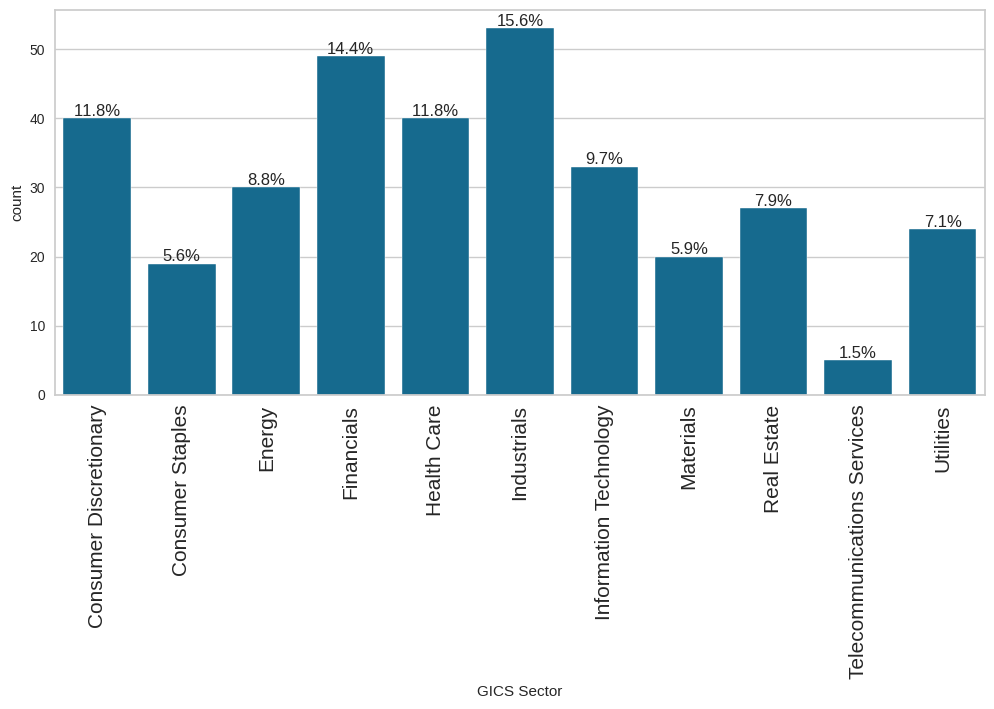

In [15]:
labeled_barplot(df, 'GICS Sector', perc=True)

* Industrials and Financials are the main sectors for investment with 15.6% and 14.4% of stocks respectively.
* Telecom services and Consumer staples are the lower end.

**`GICS Sub Industry`**

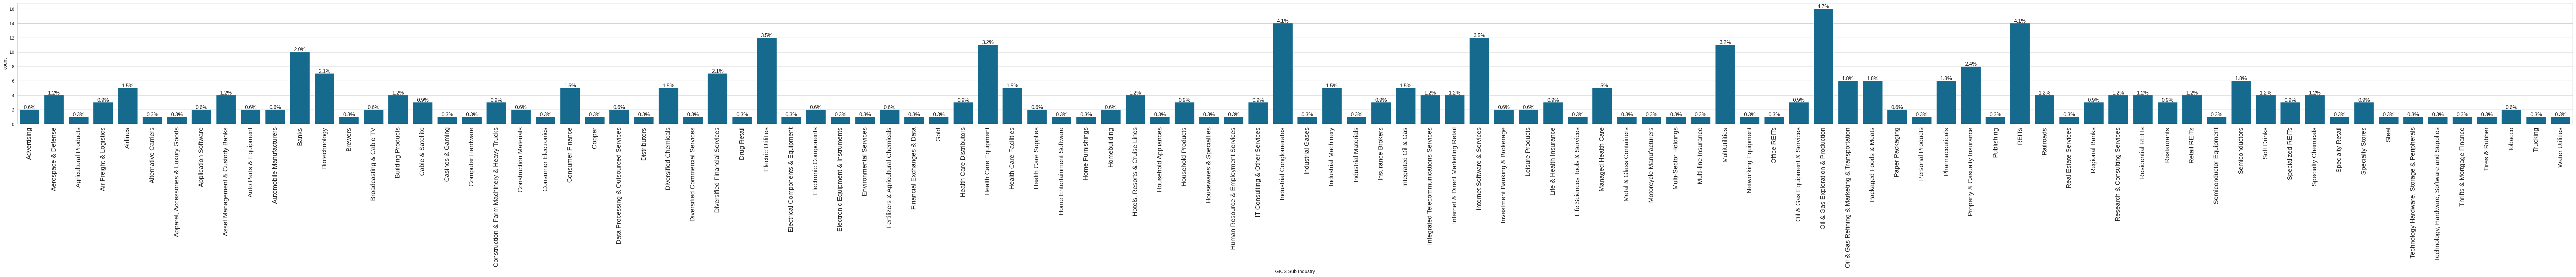

In [16]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

* Oil & Gas Exploration & Production, REITs, Industrial Conglomerates, Electric Utilities, Internet Software & Services, Health Care Equipment, MultiUtilities, and Banks have 10 or more investments.

### Bivariate Analysis

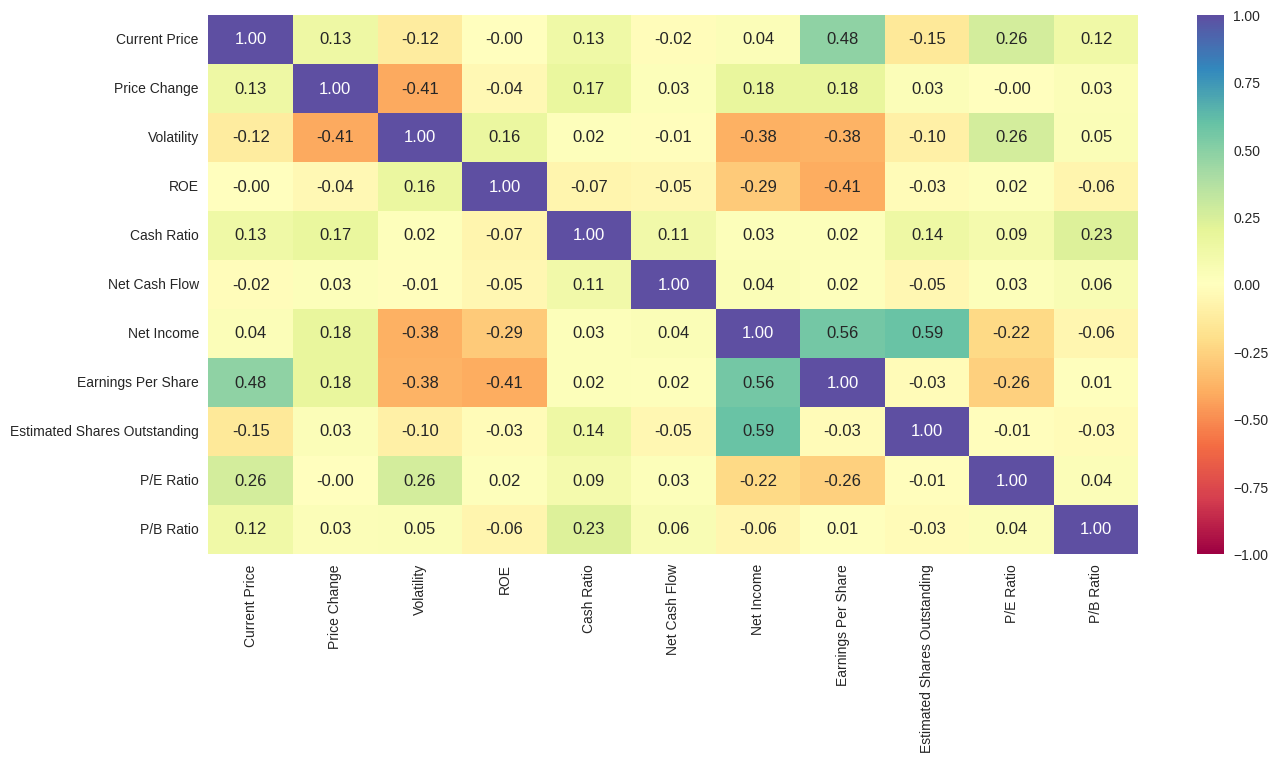

In [17]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Q3: How are the different variables correlated with each other?**
* There is no significant correlation between the variables; however there is some moderate correlation close to between 0.5 to 0.6 for some variables
* The higest positve correlations are Net Income to Earnings Per Share and Estimated Shares Outstanding - 0.59 and 0.56 respectively

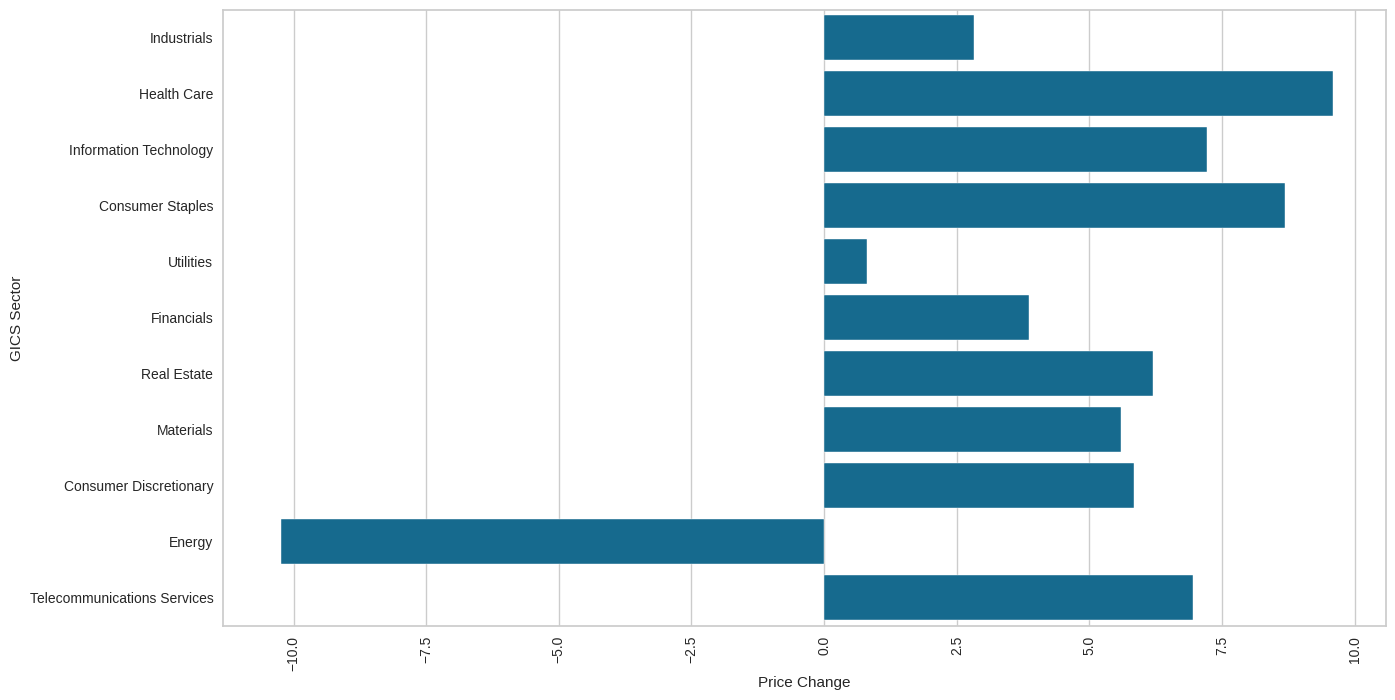

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Price Change', y='GICS Sector', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Q2: The stocks of which economic sector have seen the maximum price increase on average?**
* On average, Health Care has the highest percentage price change followed by Consumer staples and information technology.

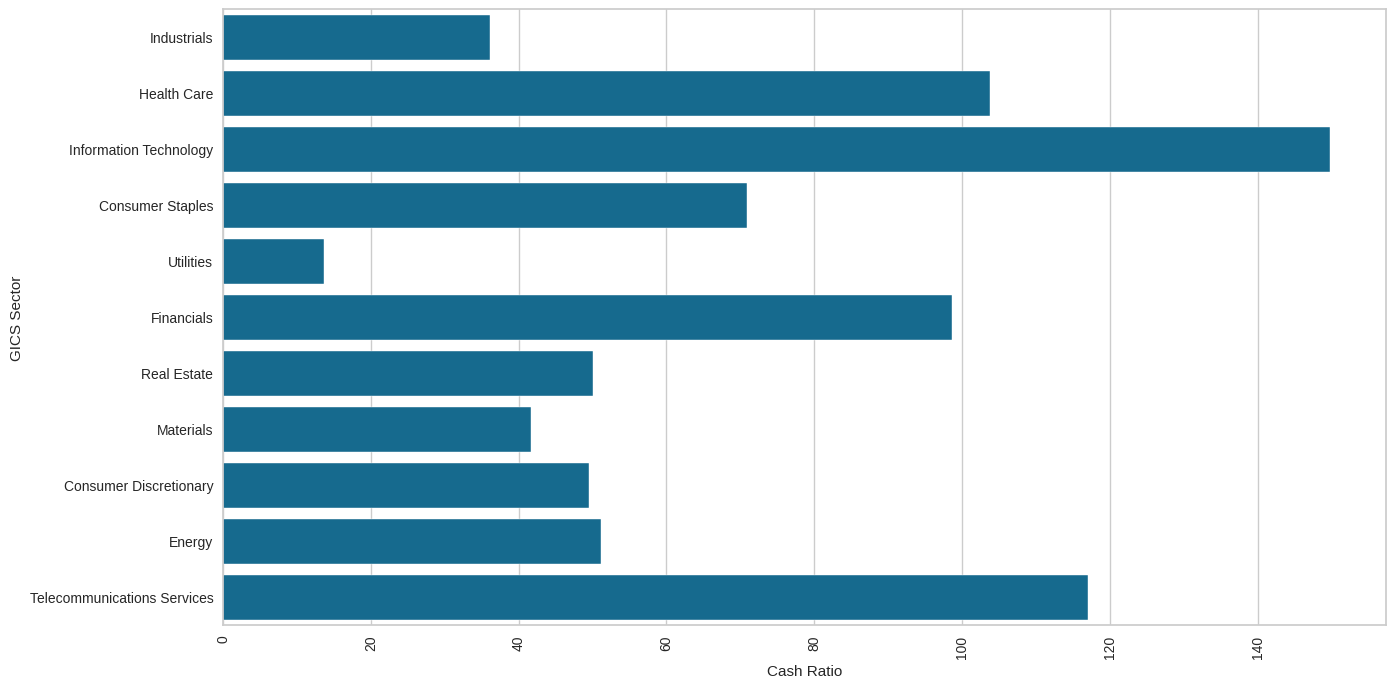

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Cash Ratio', y='GICS Sector', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Q4: Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

* Information Technology and Telecommunications Services have high cash ratios, showing their ability to cover short-term obligations.

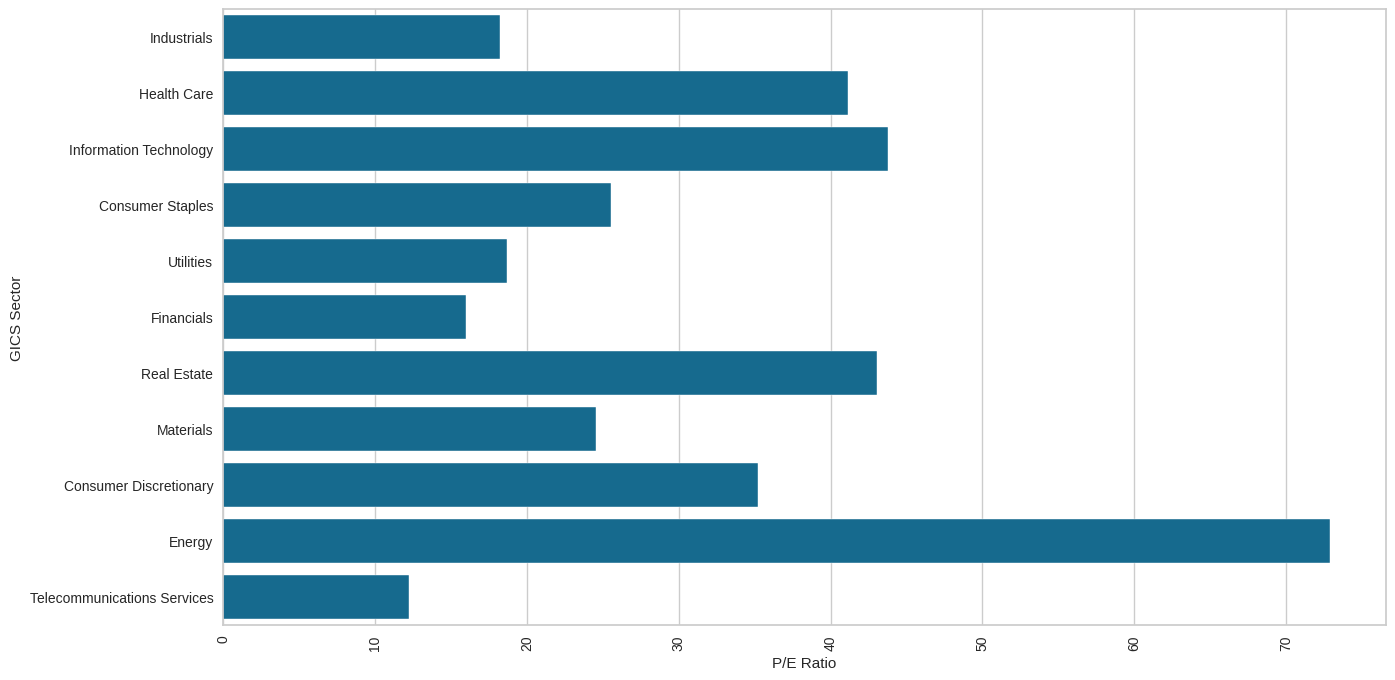

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='P/E Ratio', y='GICS Sector', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Q5: P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

* Energy has a significantly higher P/E Ratio compared to the rest of industries followed by IT and Real Estates

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

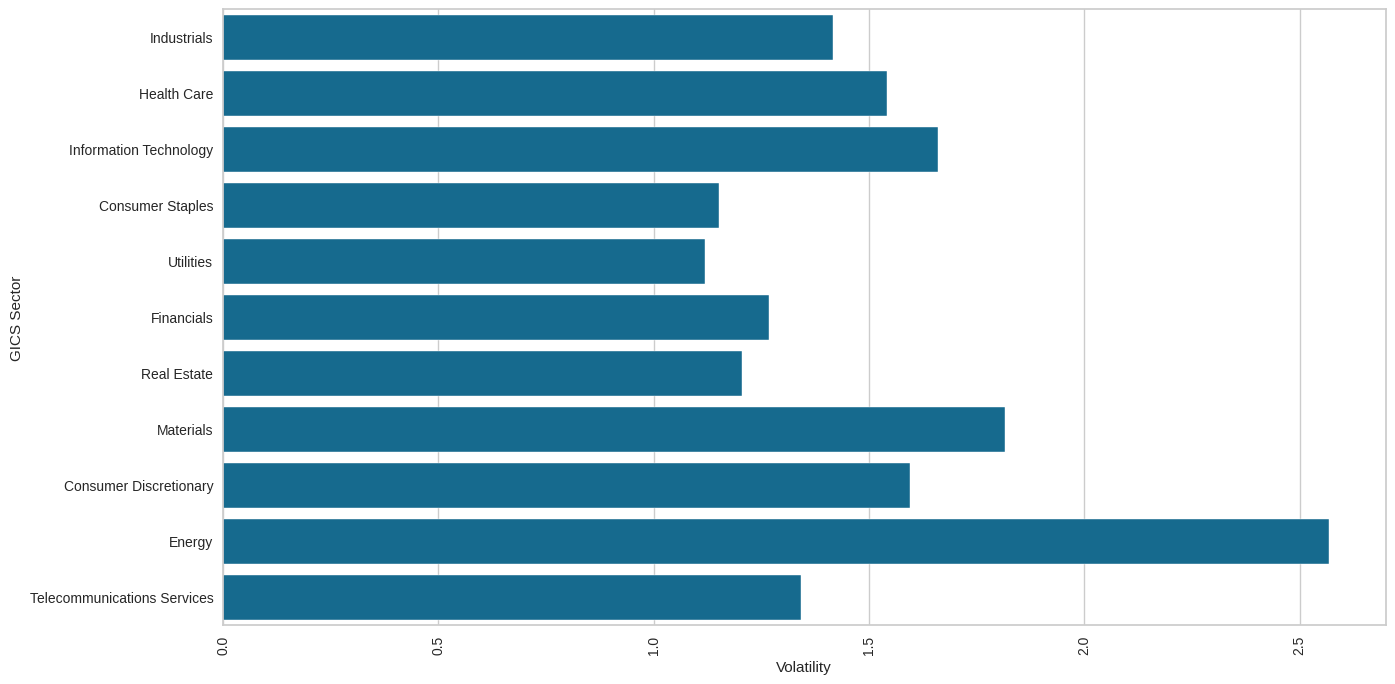

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='Volatility', y='GICS Sector', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

* Energy has the highest volatility followed by Materials and IT

## Data Preprocessing

- Outlier check
- Scaling

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

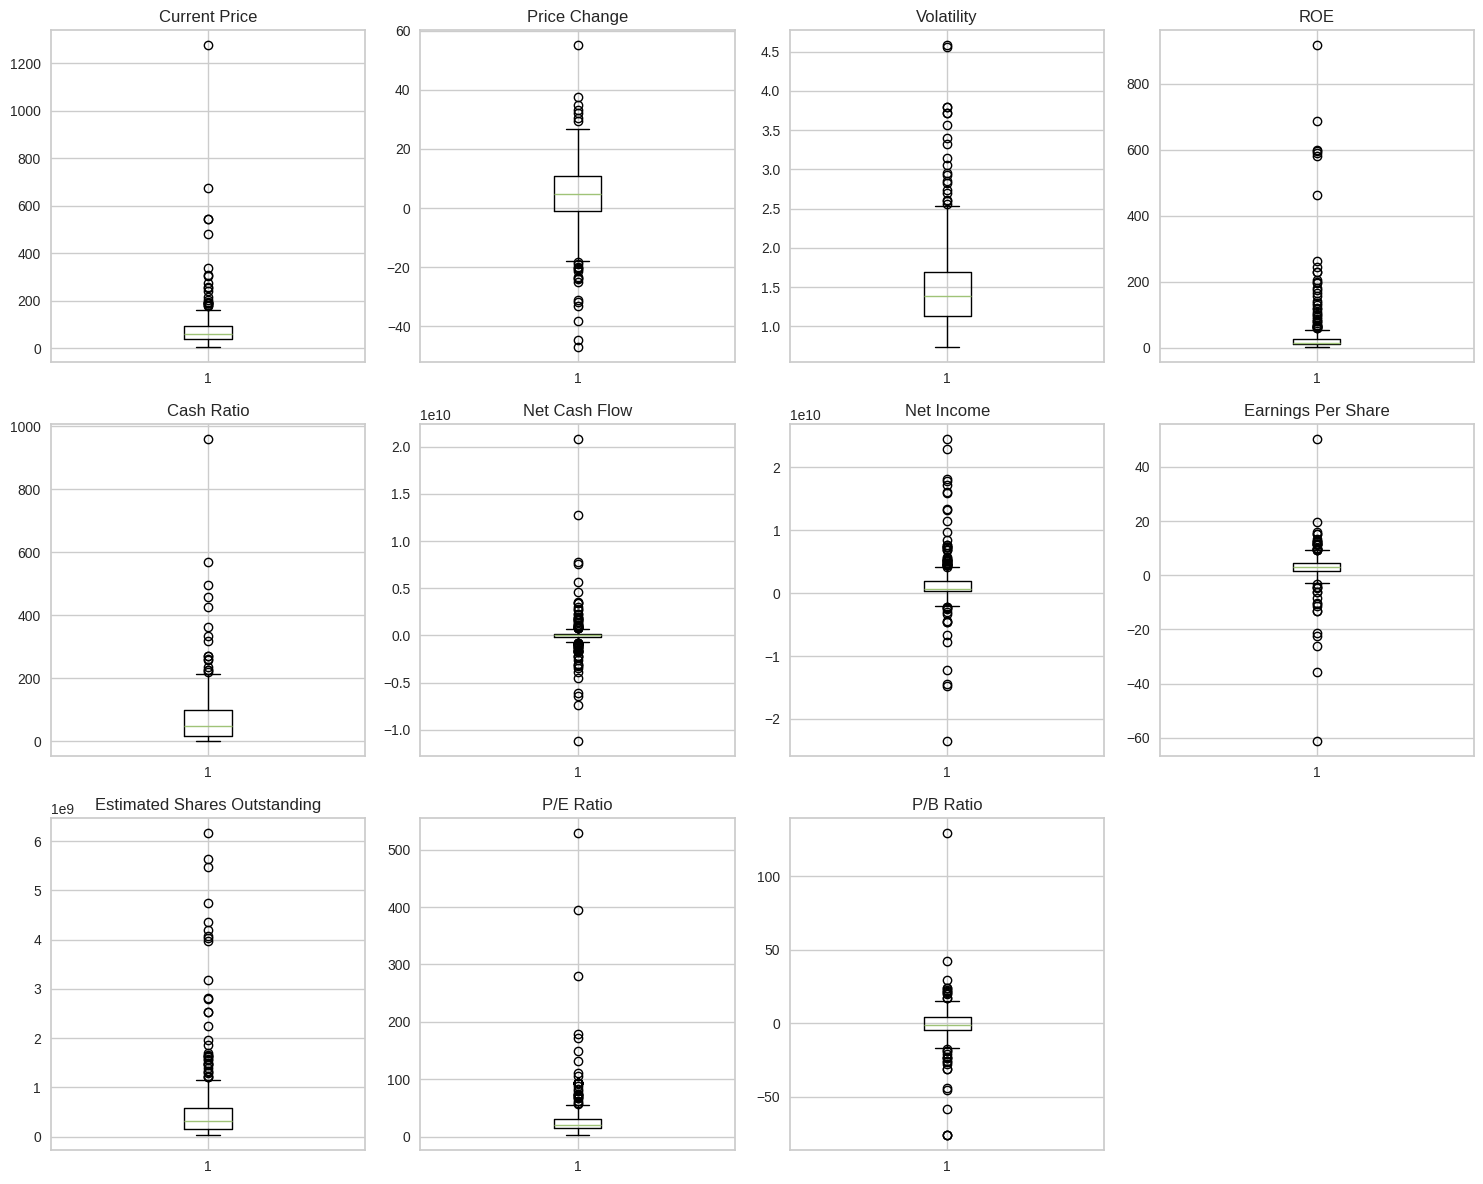

In [22]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Almost all variables have outliers.
* We will not treat them and consider them proper values.

### Scaling

- Let's scale the data before we proceed with clustering.

In [23]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [24]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [25]:
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

In [26]:
# Printing a pairplot of all the variables
sns.pairplot(data=subset_scaled_df, diag_kind="kde")
plt.show()

* There are no significant changes in data. Lets proceed from here

## K-means Clustering

### Checking Elbow Plot

In [27]:
k_means_df = subset_scaled_df.copy()

In [28]:
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411
Number of Clusters: 9 	Average Distortion: 1.956222103389025
Number of Clusters: 10 	Average Distortion: 1.9360473996664198


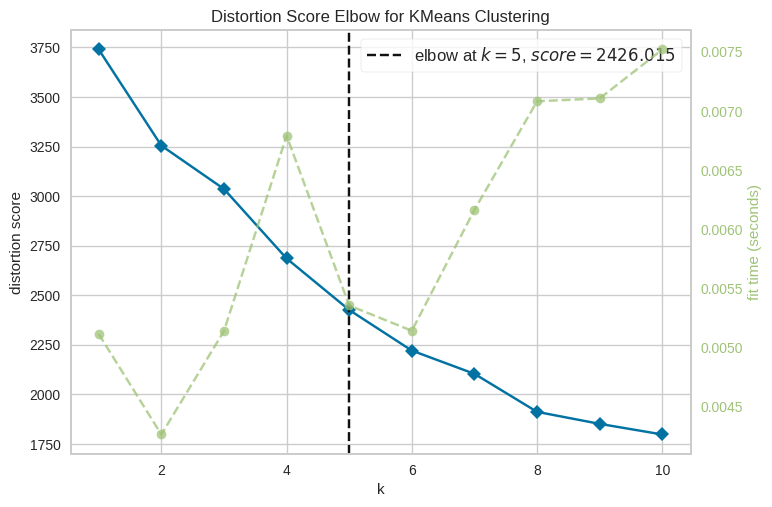

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

* Appropriate values for K seem to be between 3 and 5 where the bend decreases significantly in the elbow curve.

*Let's check silhoutte scores.*

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.45335782729503565)
For n_clusters = 3, the silhouette score is 0.40374060030338865)
For n_clusters = 4, the silhouette score is 0.4246430808437099)
For n_clusters = 5, the silhouette score is 0.4381539778147092)
For n_clusters = 6, the silhouette score is 0.40869599703024256)
For n_clusters = 7, the silhouette score is 0.1207450219233897)
For n_clusters = 8, the silhouette score is 0.3693991650696542)
For n_clusters = 9, the silhouette score is 0.35185096182499204)
For n_clusters = 10, the silhouette score is 0.32950073703610283)


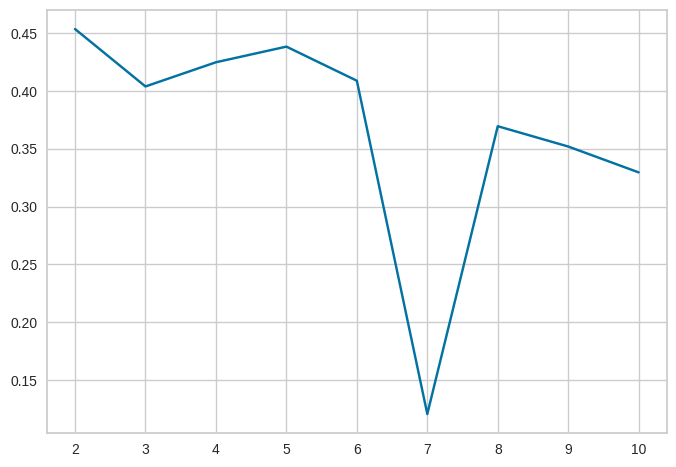

In [30]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

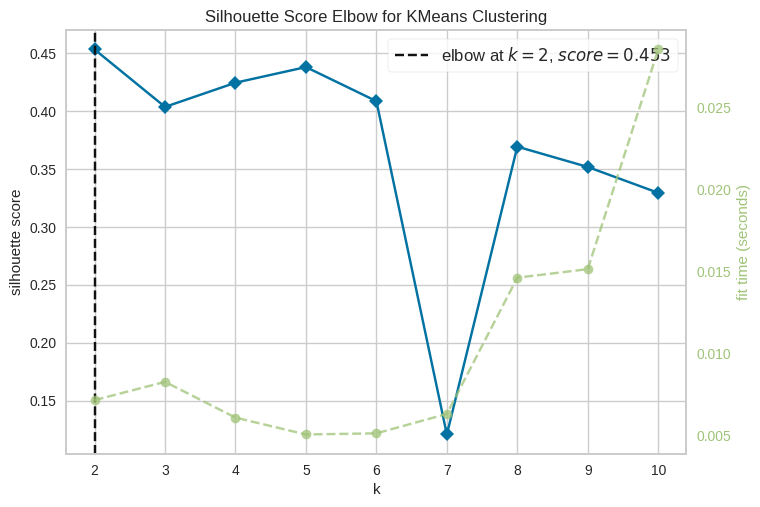

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [31]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

* Silhouette score is highest for k=5; lets plot the visualizer for k=3 to 5

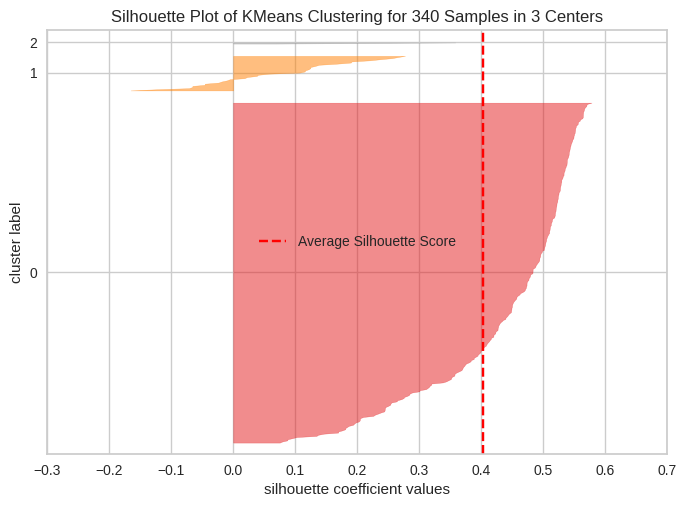

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
# finding optimal no. of clusters with silhouette coefficients - Lets try k=3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

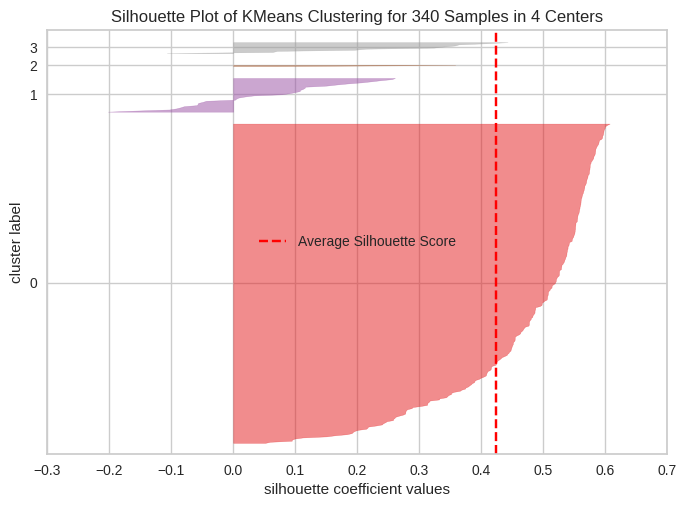

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# finding optimal no. of clusters with silhouette coefficients - Lets try k=4
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

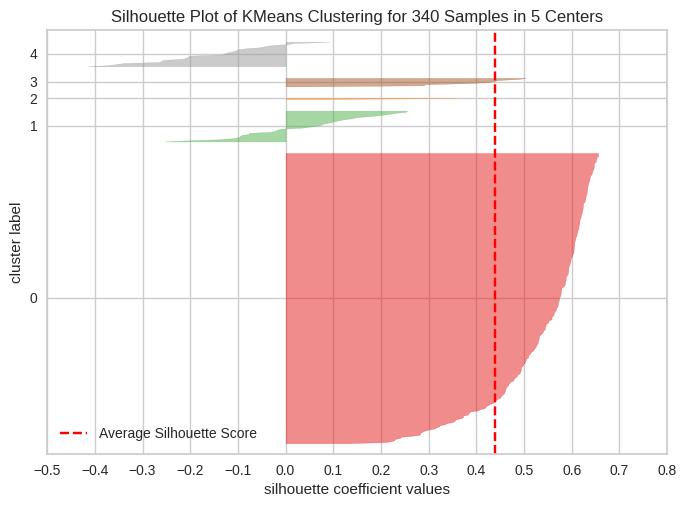

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# finding optimal no. of clusters with silhouette coefficients - Lets try k=5
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

* The Silhouette Visualizers for the chosen values of k - all 3 of them shows some overlap between clusters. However, based on the Elbow curve and the high Silhouette score, lets go ahead with k=5 as the final chosen model

### Creating Final Model

Selecting final model (k=5)

In [35]:
# final K-means model
kmeans = KMeans(n_clusters=5, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=5, random_state=1)

In [36]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [37]:
# Quick look at the labels assigned on the scaled df
k_means_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  KM_segments  
0                      0.107863  -0.652487  -0.506653            0  
1                      1.250274  -0.311769  -0.504205            0  
2                      1.098021  -0.391502   0.094941            0  
3                     -0.091622   0.947148   0.424333            0  
4                      1.978399   3.293307   0.199196            1

In [38]:
# Quick look at the labels assigned on the original df
df1.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  KM_segments  
0                  6.681299e+08    3.718174  -8.784219            0  
1                  1.633016e+09   18.806350  -8.750068            0  
2                  1.504422e+09   15.275510  -0.394171            0  
3                  4.996437e+08   74.555557   4.199651            0  
4                  2.247994e+09  178.451613   1.059810            1

### Cluster Profiling

In [39]:
# Generate cluster profile data set by grouping based on clusters for the mean of numeric cols
km_cluster_profile = df1.groupby("KM_segments").mean(numeric_only=True)

In [40]:
km_cluster_profile.head()

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
KM_segments                                                                    
0                72.738269      5.179897    1.380738   34.825455   53.138182   
1                65.106668    -11.888125    2.722141   44.000000   61.400000   
2                24.485001    -13.351992    3.482611  802.000000   51.000000   
3                46.672222      5.166566    1.079367   25.000000   58.333333   
4               211.164720     12.456786    1.699388   30.708333  280.250000   

             Net Cash Flow    Net Income  Earnings Per Share  \
KM_segments                                                    
0            -1.014729e+07  1.488642e+09            3.636164   
1            -3.685830e+07 -2.137169e+09           -5.560333   
2            -1.292500e+09 -1.910650e+10          -41.815000   
3            -3.040667e+09  1.484844e+10            3.435556   
4             2.197085e+09  2.808601e+09            6.818333   

             Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
KM_segments                                                       
0                            4.379616e+08   23.680917  -3.395254  
1                            5.297142e+08  113.488924   0.905486  
2                            5.195740e+08   60.748608   1.565141  
3                            4.564960e+09   15.596051  -6.354193  
4                            7.389574e+08   37.895420  15.682619

In [41]:
# Add a count column to see the number of companies in each cluster
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [42]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [43]:
## to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [44]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Energy                         21
             Health Care                     1
             Industrials                     1
             Information Technology          4
             Materials                       2
2            Energy                          2
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
4            Consumer Discretionary          5
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     9
             Information Technology          5
             Real Estate                     1
             Telecommunications Services     1
Name: Security, dtype: int64

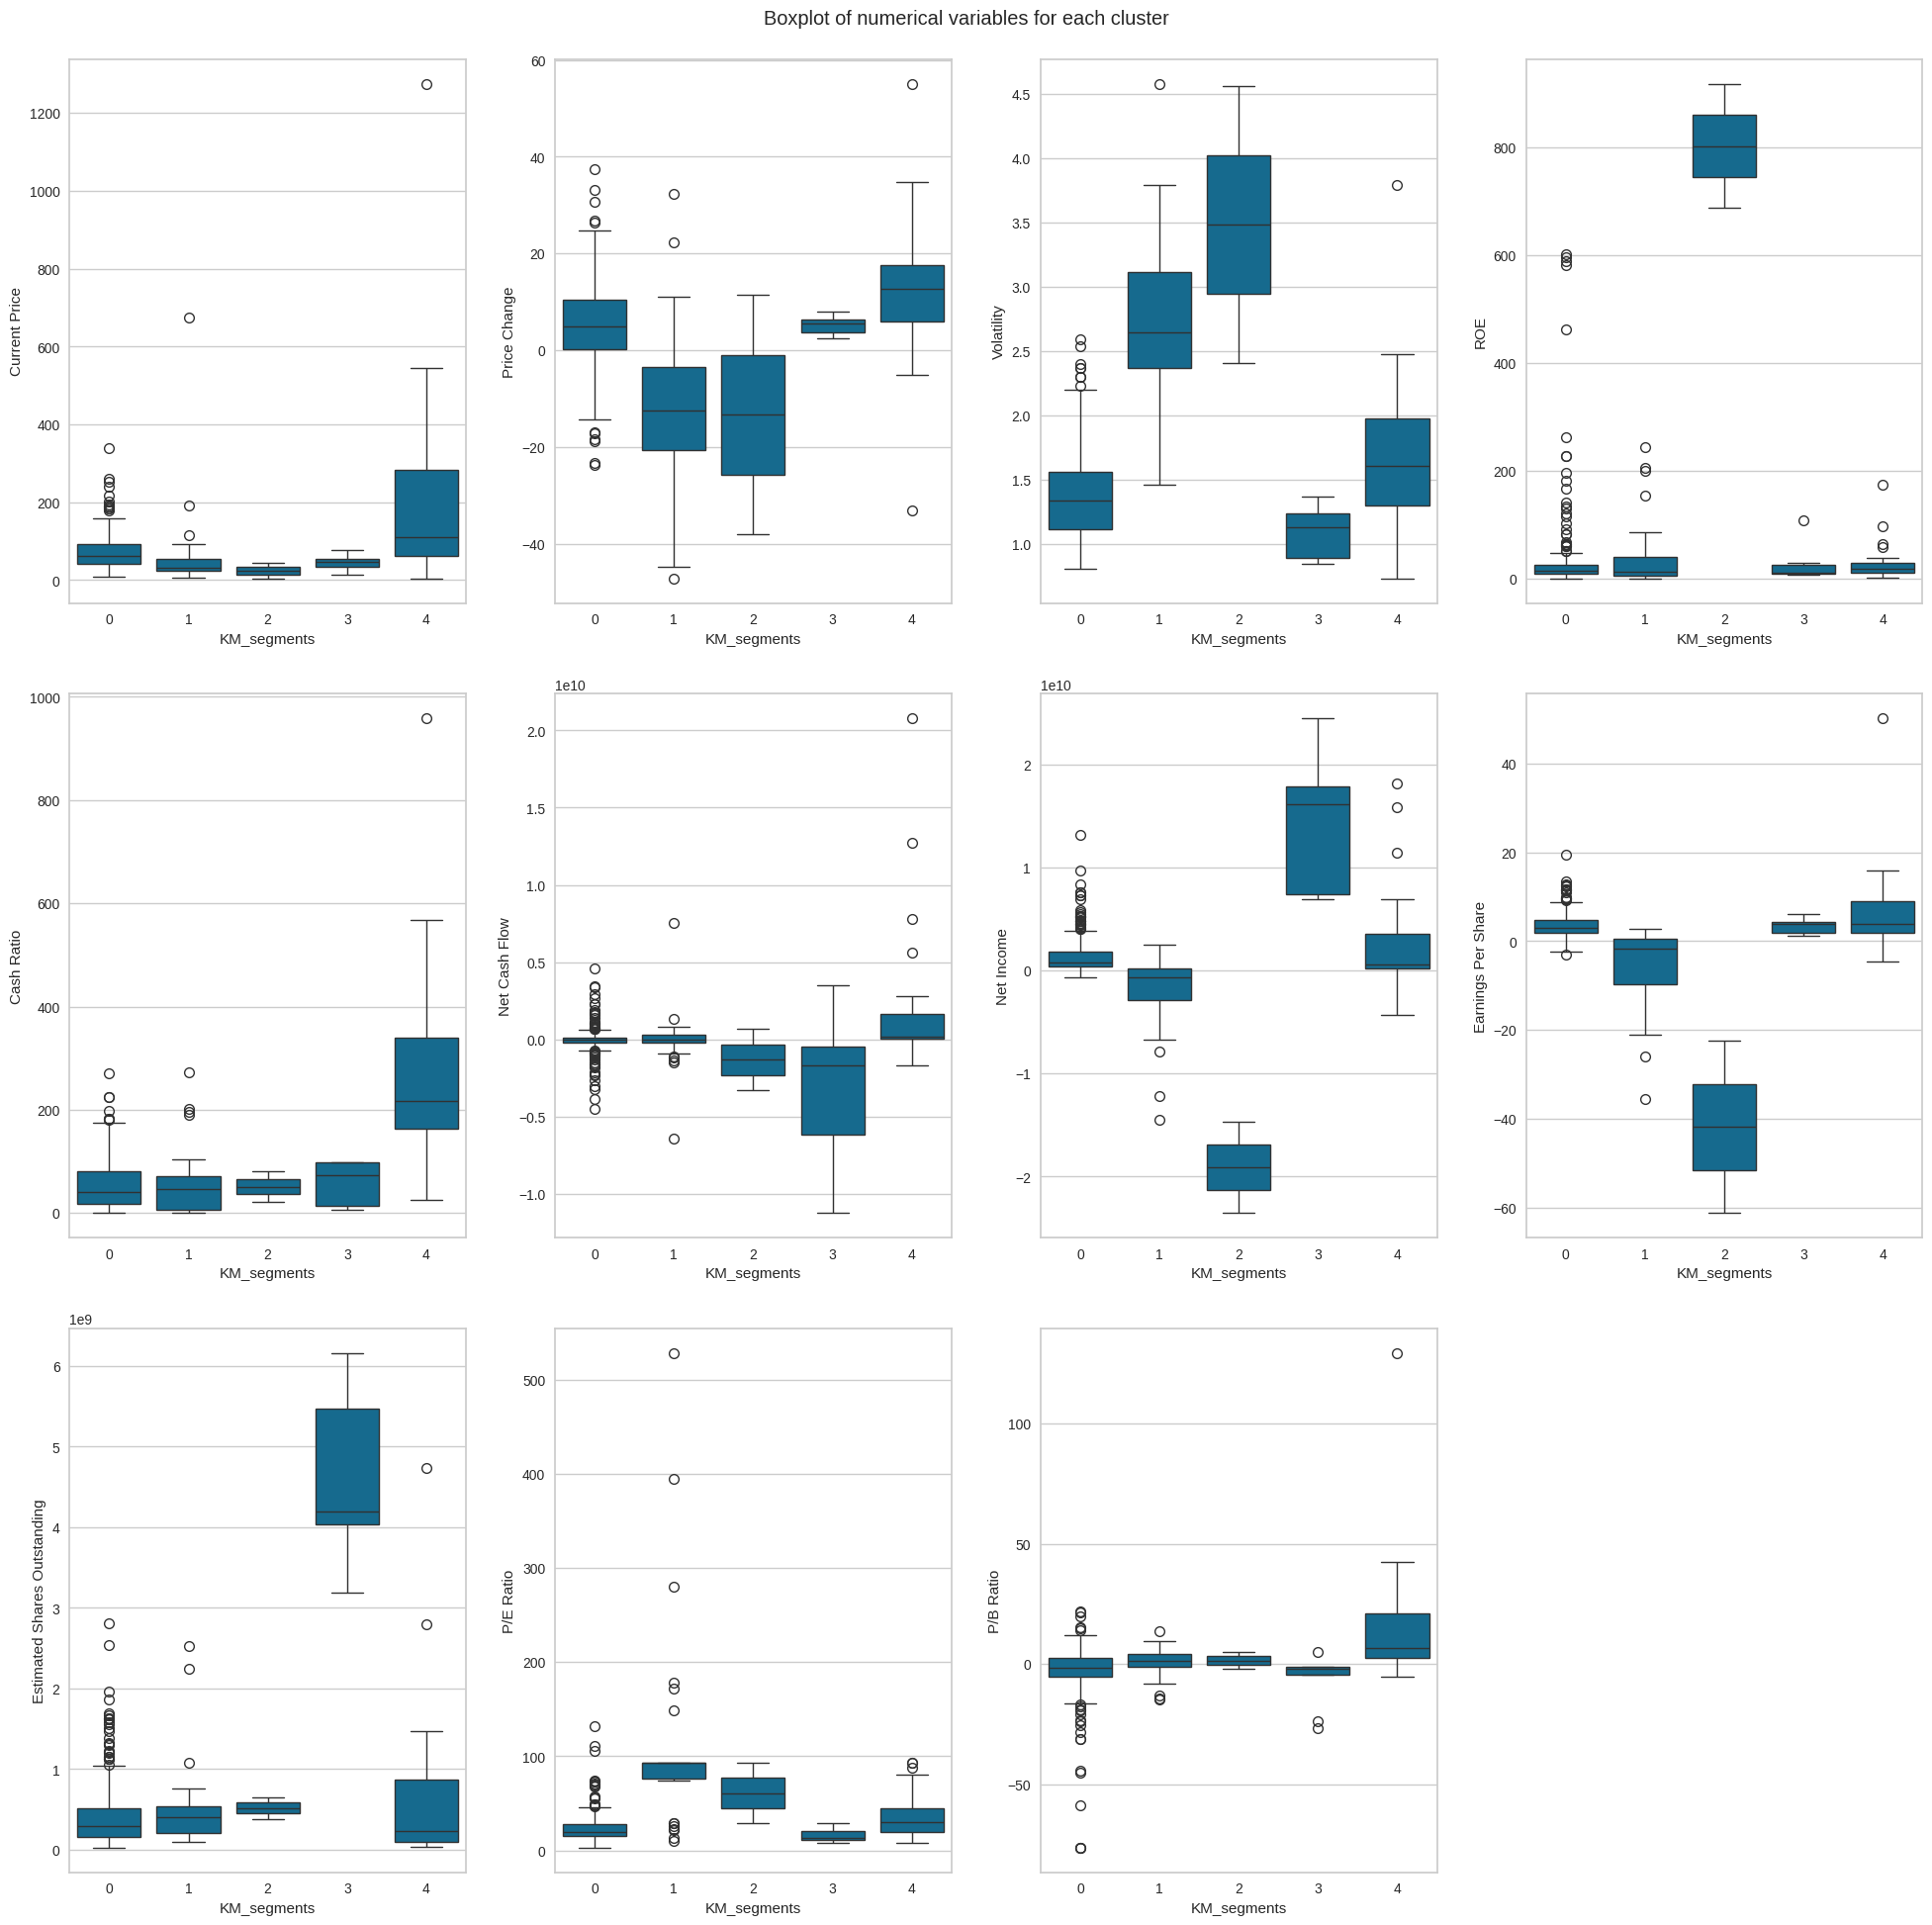

In [45]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

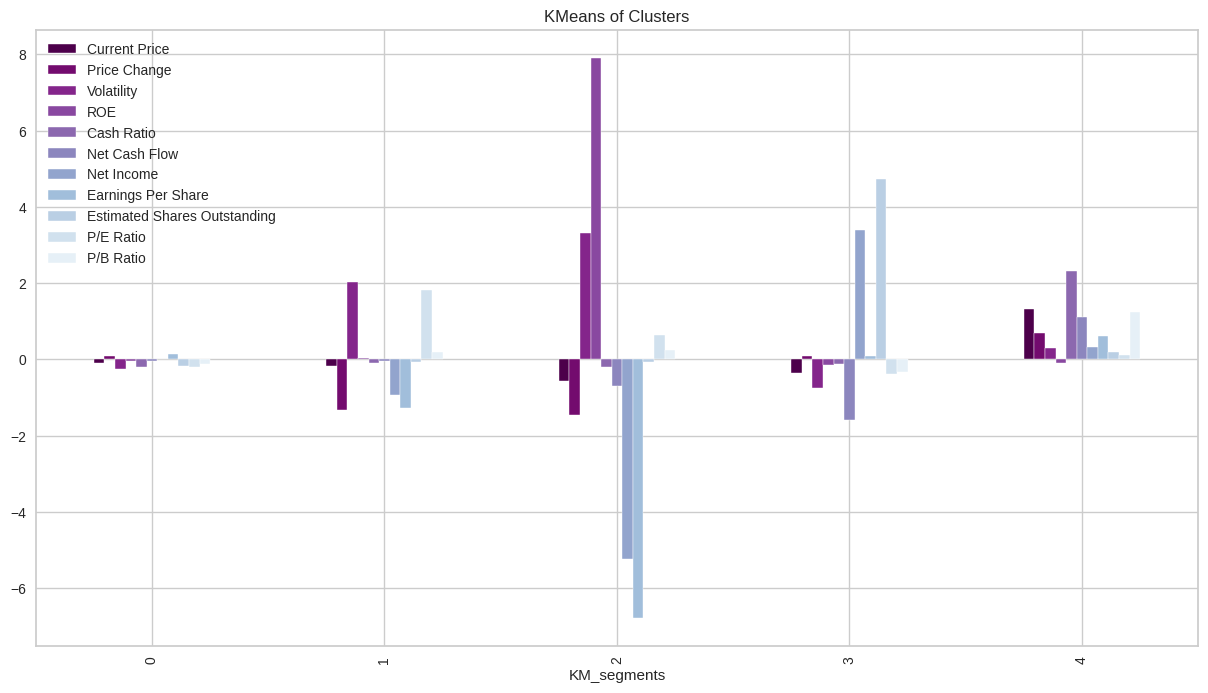

In [46]:
# Plot a color bar graph with the numeric cols in each segments
num_of_bars = len(k_means_df.columns) - 1  # Subtract 1 for the GROUP column
cm = plt.get_cmap('BuPu_r')
colors = [cm(1. * i / num_of_bars) for i in range(num_of_bars)]

# Plot the bar chart with unique colors
grouped_means = k_means_df.groupby("KM_segments").mean()
grouped_means.plot.bar(figsize=(15, 8), color=colors)
plt.title("KMeans of Clusters")
plt.show()

### Insights

- Cluster 0:
    * This is the largest cluster created.
    * There are 275 companies and 11 economic sectors.
    * All Utilities stocks are in this cluster.
    * Most of the Industrial and Financial sector belong to this cluster
    * The average stock price for this cluster is 72.74 USD
- Cluster 1:
    * There are 30 companies and 6 economic sectors.
    * Most energy stocks are in this cluster.
    * The average stock price for this cluster is 65.11 USD
    * This cluster has the highest average P/E ratio
- Cluster 2:
    * This is the smallest customer with 2 companies and both belong to the Energy sector.
    * This cluster has got the highest avrage volatility and ROE
- Cluster 3:
    * There are 9 companies and 6 economic sectors.
    * This cluster has got the highest average net income and shares outstanding

- Cluster 4:
    * There are 24 companies and 8 economic sectors.
    * This cluster has got the highest of average for Current price, price change, cash ratio, net cash flow, earnings per share and P/B ratio


## Hierarchical Clustering

### Computing Cophenetic Correlation

In [47]:
hc_df = subset_scaled_df.copy()

In [48]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Let's explore different linkage methods with Euclidean distance only.**

In [49]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


* The cophenetic correlation is maximum with Euclidean distance and average linkage

**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

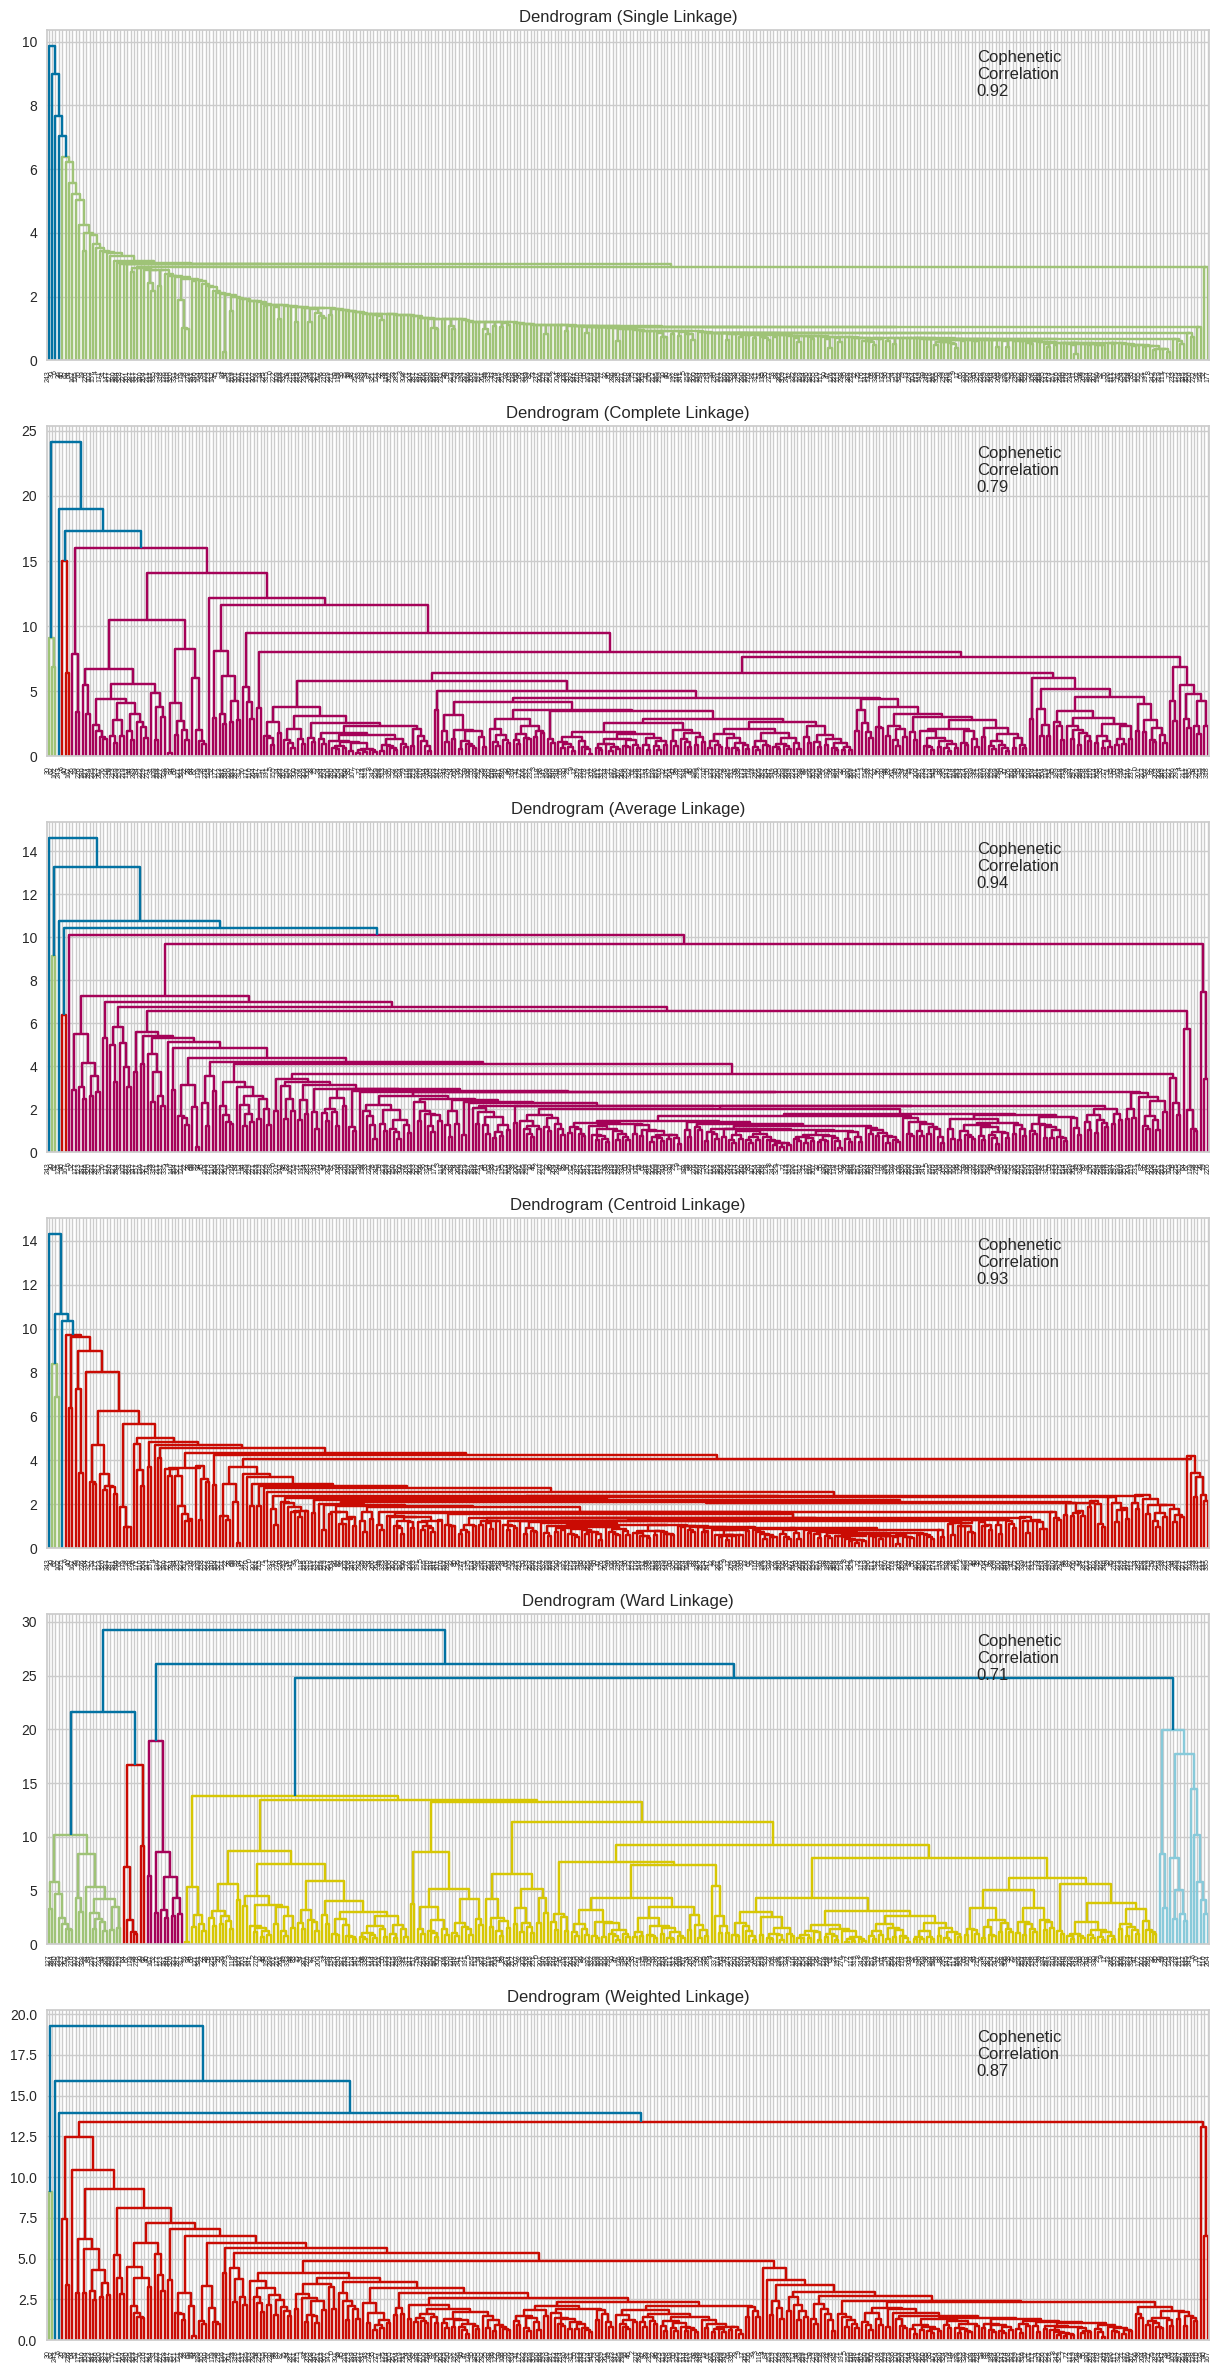

In [50]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [51]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

* Cophenetic correlation is highest with average and centroid linkage.
* However, looking at the dendograms, the "ward" linkage appeares to be providing more distinct clusters with a not so bad cophenetic correlation of 0.71
* 5 would be an appropriate amount of clusters from the dendrogram with ward linkage.

### Creating model using sklearn

In [52]:
HCmodel = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=5)

In [53]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [54]:
hc_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  HC_segments  
0                      0.107863  -0.652487  -0.506653            3  
1                      1.250274  -0.311769  -0.504205            3  
2                      1.098021  -0.391502   0.094941            3  
3                     -0.091622   0.947148   0.424333            3  
4                      1.978399   3.293307   0.199196            3

In [55]:
df2.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  HC_segments  
0                  6.681299e+08    3.718174  -8.784219            3  
1                  1.633016e+09   18.806350  -8.750068            3  
2                  1.504422e+09   15.275510  -0.394171            3  
3                  4.996437e+08   74.555557   4.199651            3  
4                  2.247994e+09  178.451613   1.059810            3

### Cluster Profiling

In [56]:
hc_cluster_profile = df2.groupby("HC_segments").mean(numeric_only=True)

In [57]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [58]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [59]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [60]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy                          7
             Financials                     44
             Health Care                    34
             Industrials                    52
             Information Technology         27
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
4            Energy                         20
             Information Technology          1
             Materials                       1
Name: Security, dtype: int64

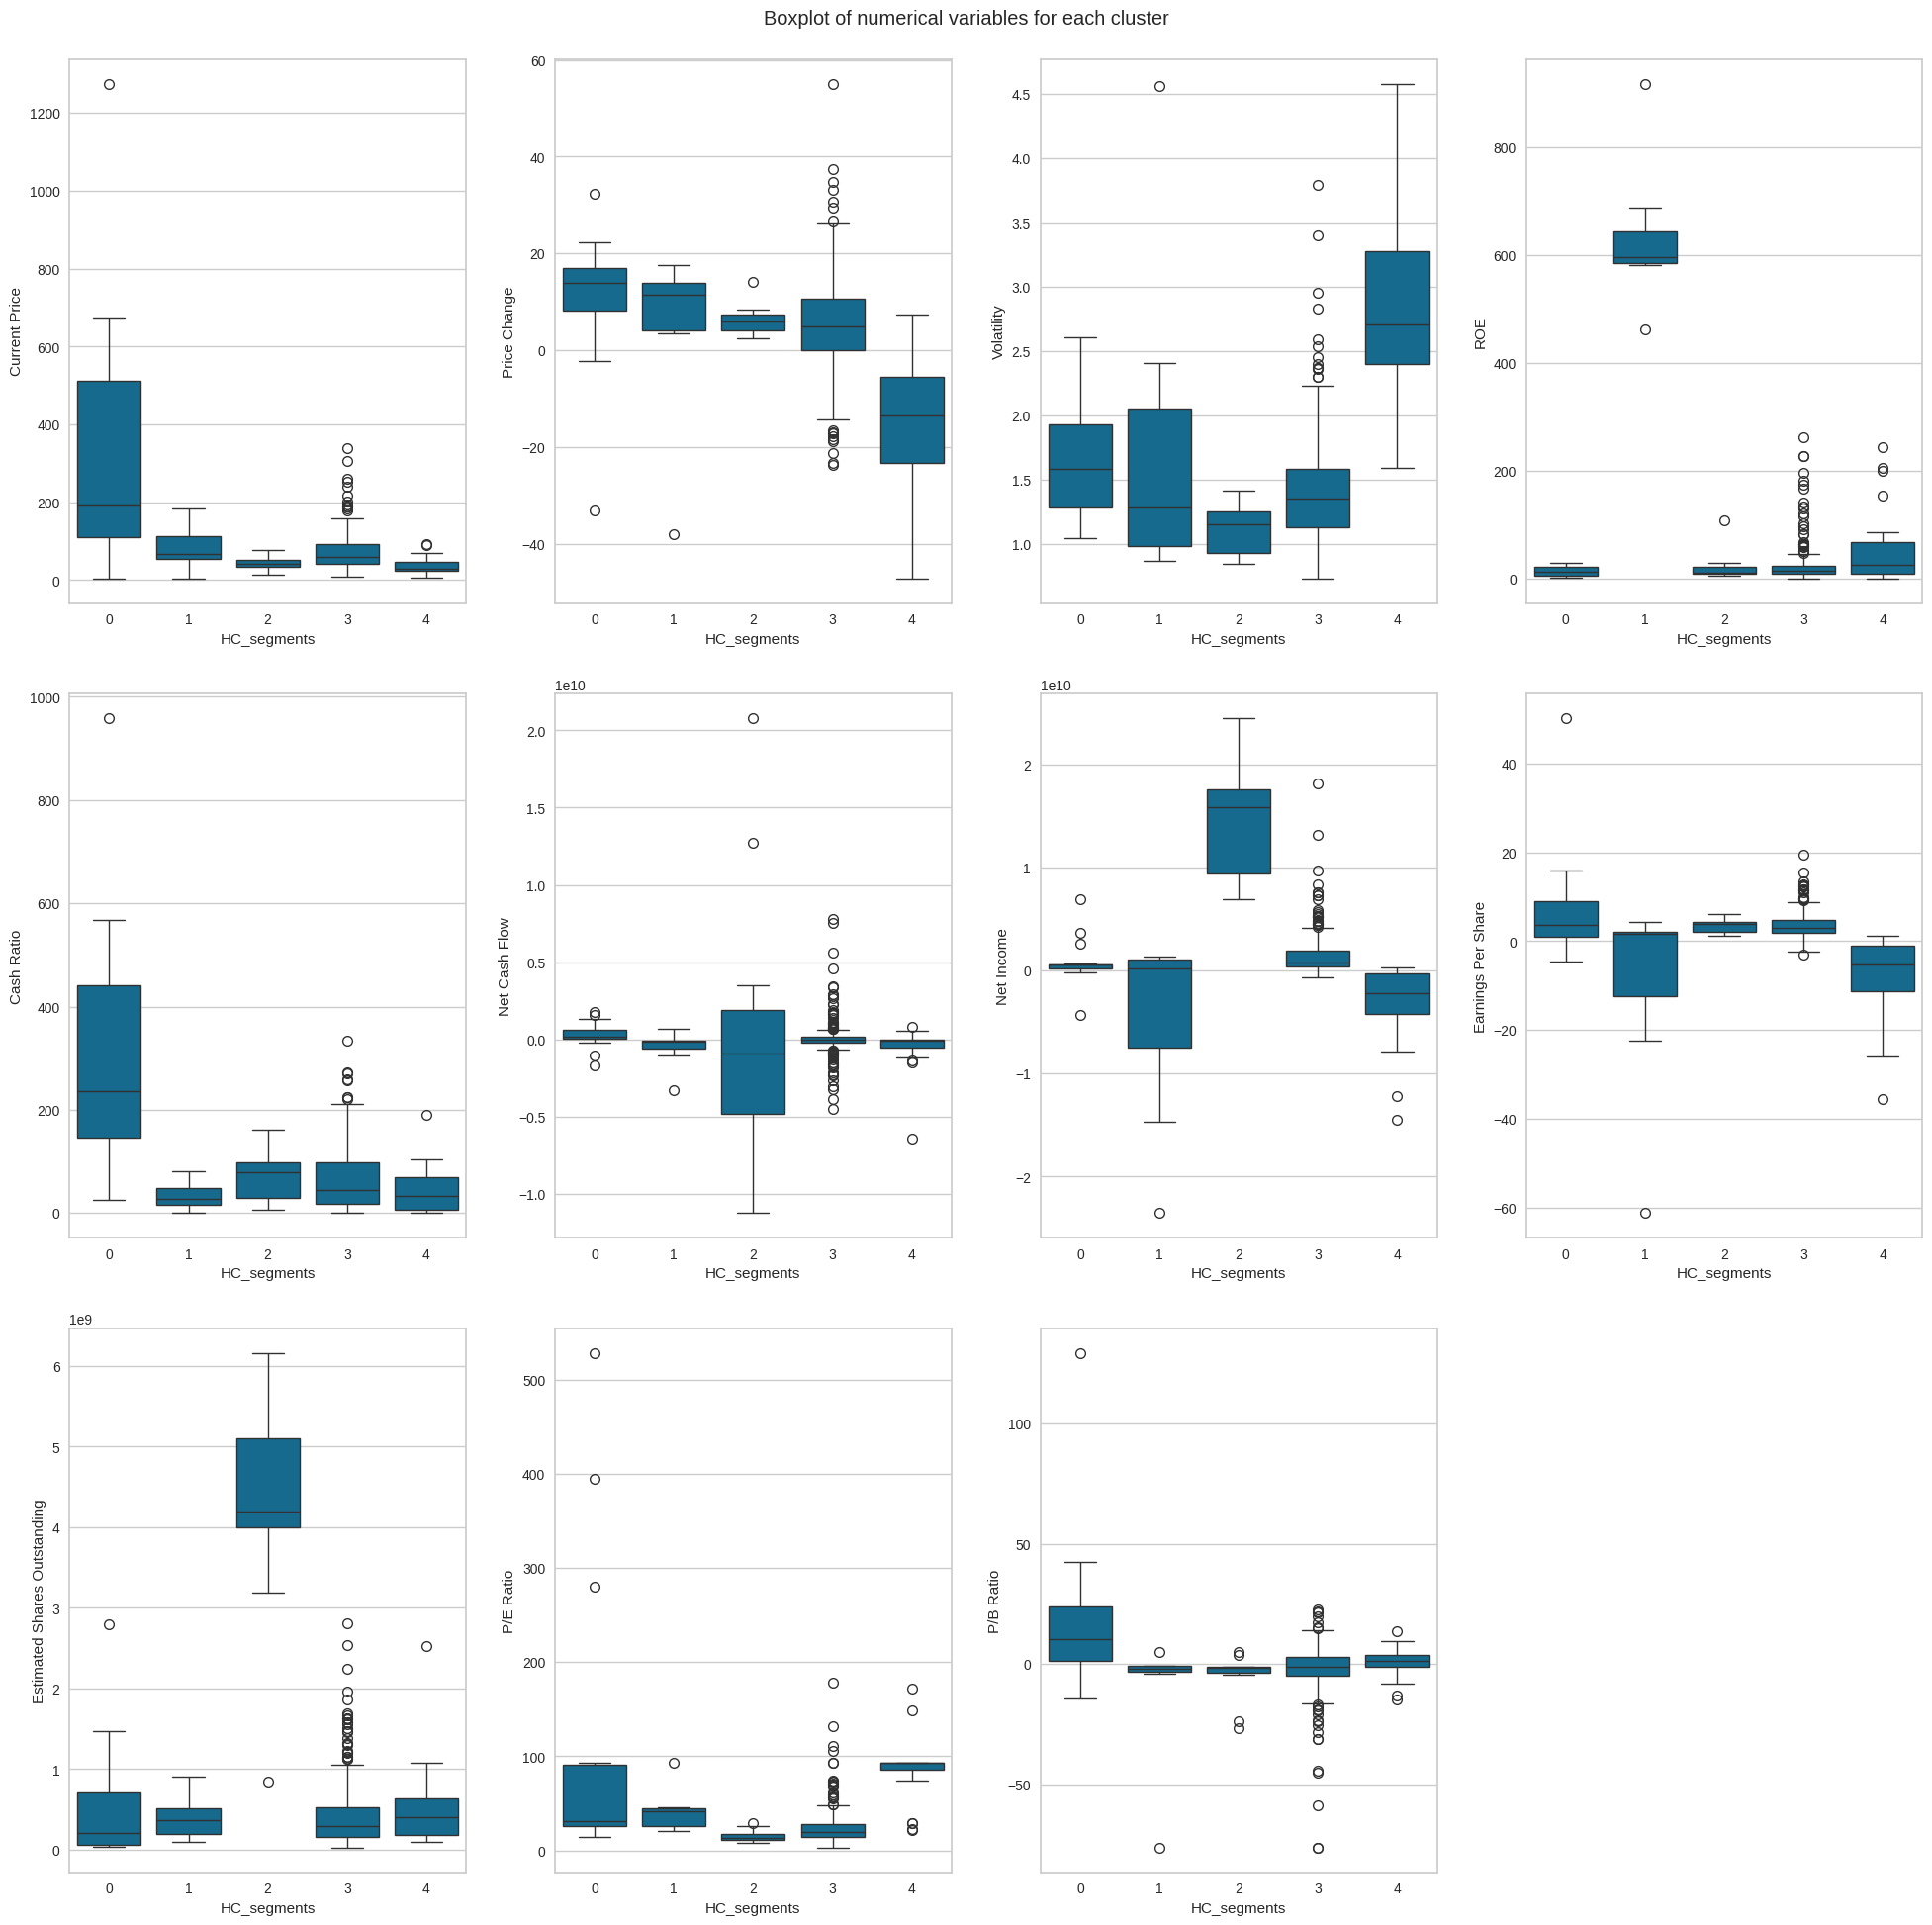

In [61]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

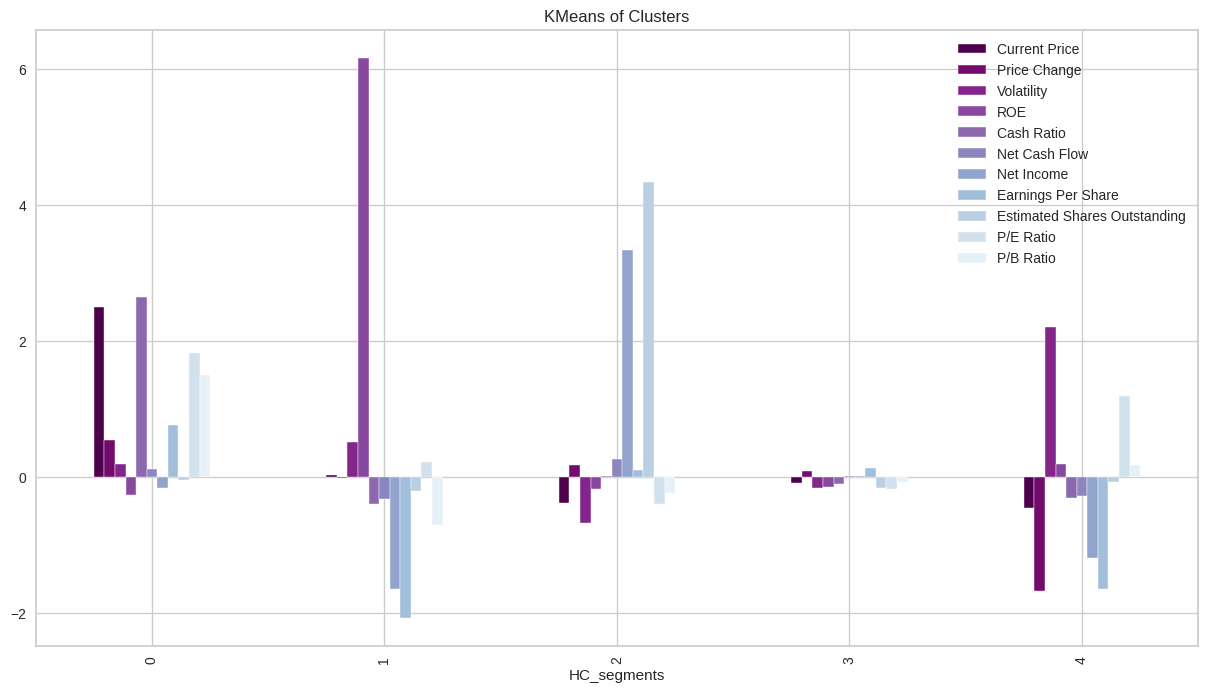

In [62]:
# Plot a color bar graph with the numeric cols in each segments
num_of_bars = len(hc_df.columns) - 1  # Subtract 1 for the GROUP column
cm = plt.get_cmap('BuPu_r')
colors = [cm(1. * i / num_of_bars) for i in range(num_of_bars)]

# Plot the bar chart with unique colors
grouped_means = hc_df.groupby("HC_segments").mean()
grouped_means.plot.bar(figsize=(15, 8), color=colors)
plt.title("KMeans of Clusters")
plt.show()

## Insights

- Cluster 0:
    * There are 15 companies and 6 economic sectors.
    * The average stock price for this cluster is 326.2 USD
    * This cluster has the highest average for current price, price change,cash ratio,earnings per share, P/E ratio and P/B ratio
     
- Cluster 1:
    * This is the smallest cluster and has 7 companies and 5 economic sectors.
    * The average stock price for this cluster is 84.36 USD
    * This cluster has the highest average ROE

- Cluster 2:
    * This cluster has 11 companies in 7 economic clusters
    * This cluster has got the highest average net cash flow,net income and estimated shares outstanding

- Cluster 3:
    * This is the largest cluster with 285 companies in 11 sectors
    * The average stock price for this cluster is 72.76 USD

- Cluster 4:
    * There are 22 companies and 3 economic sectors.
    * This cluster has got the highest of average for volatility

## K-means vs Hierarchical Clustering

In [63]:
#Summary for K-Means Clustering
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [64]:
#Summary of hierarchical clustering
hc_cluster_profile.style.highlight_max(color="orange", axis=0)

- Both Clustering techniques were similar in terms of execution time and did not take much time
- Both techniques indicated a cluster size of 5 would be optimal for the given dataset
- Hierrachical clustering returned slightly better distinctine clusters than the k-means clusters
- The distribution of clusters (in terms of their size)in both seem to be similar
- Both techniques provided a very large cluster and rest of the smaller clusters

## Actionable Insights and Recommendations

- There are 5 clusters created with k-means technique and hierarchical clustring techniques - The summary of clusters are given abo ve withe each one of them
- Trade & Ahead can use these clusters to provide customers with personalized investment strategies.
- Trade & Ahead may select stocks from different clusters to provide a diversified portfolio, yield higher returns, and face lower risk.
- At the same time, the firm may need to look at the differences in clusters provided by the 2 techniques above and then go with the one that aligns with client specific needs.
- The different metrices captured in each of the cluster profiling sections may also be reviewed to decide which clusters to go with based on the customer needs.
- There is still scope for improvement and company should approach doing these clustering periodically based on the feedback and for more effective profiling sections.